## **Problema: Encontrar a los mejores candidatos que permanezcan en la empresa**
- ¿Qué empleados tienen más probabilidad de quedarse trabajando en la empresa una vez contratados?

# PASO 1: HACEMOS UNA INSPECCIÓN GENERAL AL DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importamos el data set desde Git
workers_df = pd.read_csv("https://raw.githubusercontent.com/joanby/ds4b/main/1.%20Human%20Resources%20Data/Human_Resources.csv")
workers_df.sample(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
936,45,No,Travel_Frequently,364,Research & Development,25,3,Medical,1,1306,...,3,80,0,22,4,3,0,0,0,0
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
1014,31,No,Travel_Rarely,182,Research & Development,8,5,Life Sciences,1,1430,...,3,80,0,9,3,4,3,2,1,0
1095,33,No,Travel_Rarely,589,Research & Development,28,4,Life Sciences,1,1549,...,2,80,1,15,3,3,15,14,5,7


In [3]:
workers_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
workers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# vemos cuantas variables enteras tenemos 
aux = workers_df.dtypes.astype(str)
aux[aux == "int64"].shape[0]

26

In [6]:
# vemos las variables categoricas
var_cat = aux[aux == "object"].index.to_list()
var_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# PASO 2: HACEMOS UNA VISUALIZACIÓN GENERAL AL DATASET

In [7]:
def T_bin(x):
  if (x == "Yes") or (x == "Y"):
    return 1
  else:
    return 0

In [8]:
# Reemplazamos las columnas 'Attritition', 'Over18 y 'Overtime' por variables binarias para poder visualizar
workers_df['Attrition'] = workers_df['Attrition'].apply(lambda x: T_bin(x))
workers_df['OverTime'] = workers_df['OverTime'].apply(lambda x: T_bin(x))
workers_df['Over18'] = workers_df['Over18'].apply(lambda x: T_bin(x))

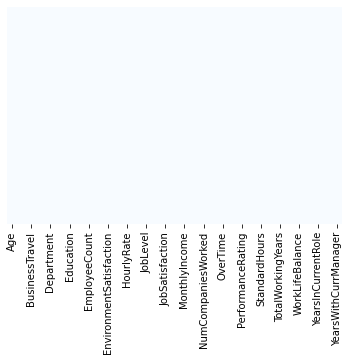

In [9]:
# Veamos si nos faltan datos. En efecto, como vimos arriba, no faltan.
sns.heatmap(workers_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

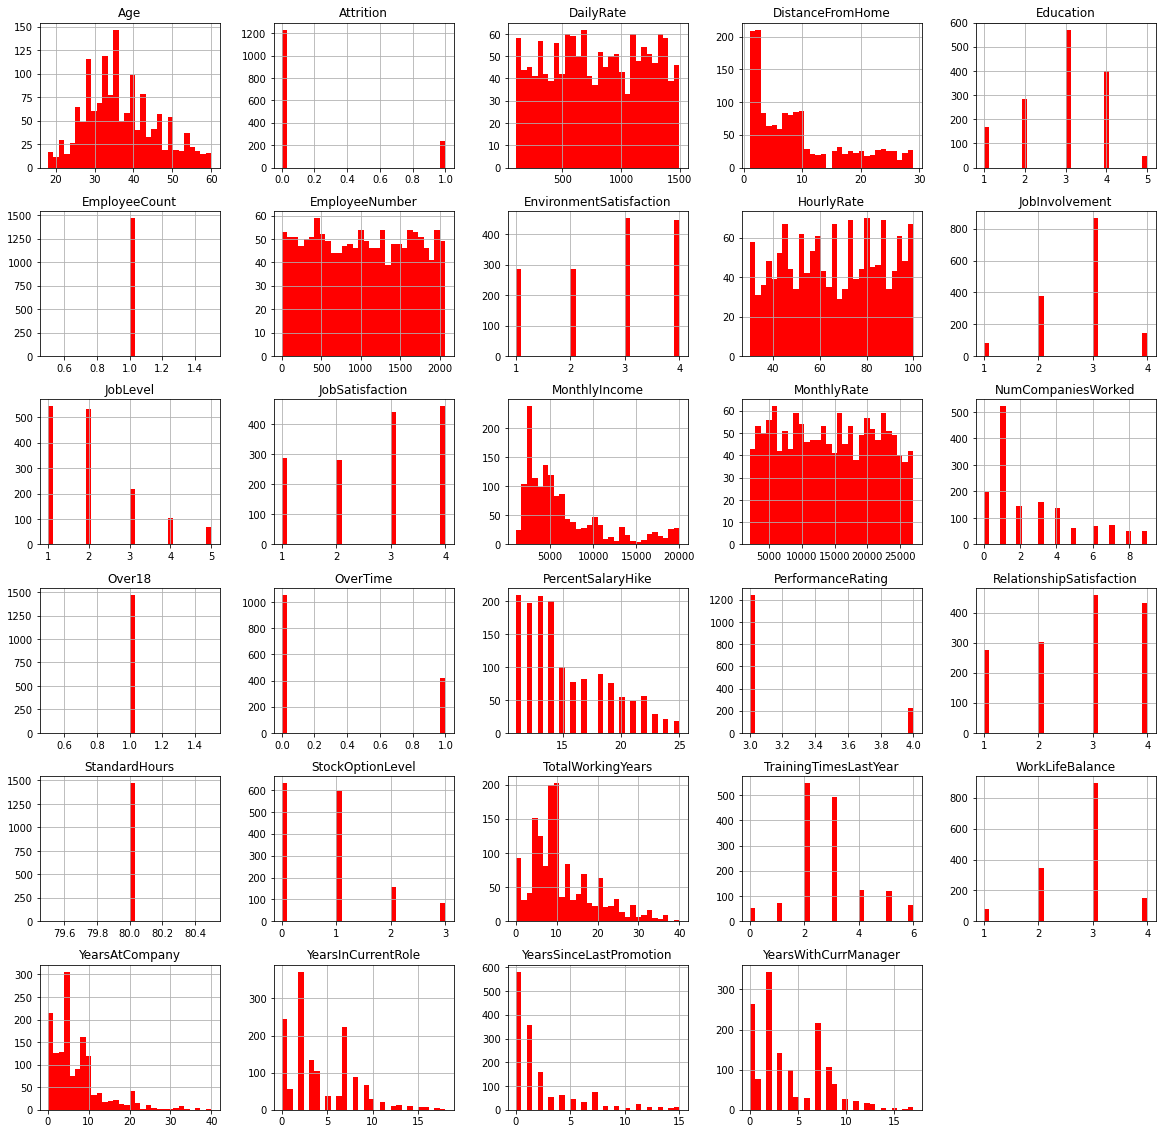

In [10]:
# Visualizamos las distribuciones de todas las variables
workers_df.hist(bins = 30, figsize=(20,20), color = 'r')
plt.show()

In [11]:
# Notamos que hay variables que no aportan información, tales como "Over18", "StandardHours" y "EmployeeCount". 
# Por otro lado "EmployeeNumber" es solo un identificador que no determina ninguna caracteristica particular.
# Es por esto que las vamos a eliminar del DataSet

workers_df.drop(["Over18", "StandardHours", "EmployeeNumber", "EmployeeCount"], inplace = True, axis = 1)

In [12]:
pd.set_option('display.max_columns', None)
workers_df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1181,49,0,Travel_Rarely,465,Research & Development,6,1,Life Sciences,3,Female,41,2,4,Healthcare Representative,3,Married,13966,11652,2,1,19,3,2,1,30,3,3,15,11,2,12


In [13]:
# Veremos cuantos empleados abandonan y cuantos se quedan
left_df   = workers_df[workers_df['Attrition'] == 1]
stayed_df = workers_df[workers_df['Attrition'] == 0] 

In [14]:
# Contamos el número de empleados que se quedaron y que se fueron
# Parece que estamos ante un conjunto de datos desequilibrado

print("Total de Empleados: ", len(workers_df))

print("Número de empleados que dejan la empresa: ", len(left_df), ", que representan a un: ", round(1.*len(left_df)/len(workers_df)*100.0,1), "% de los trabajadores")
print("Número de empleados que dejan la empresa: ", len(stayed_df), ", que representan un porcentaje: ", round(1.*len(stayed_df)/len(workers_df)*100.0,1), "% de los trabajadores")

Total de Empleados:  1470
Número de empleados que dejan la empresa:  237 , que representan a un:  16.1 % de los trabajadores
Número de empleados que dejan la empresa:  1233 , que representan un porcentaje:  83.9 % de los trabajadores


In [15]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**Obervaciones:**
- Comparando los promedio de edad ("Age") podemos ver que en promedio los que se van son mas jóvenes que los que se quedan
- Vemos como existe un diferencia en la paga por dia ("DailyRate") entre los empleados que se quedan y se van. Se observa que el valor promedio es mayor para quienes se quedan en la empresa.
- Tambien es posible observar que Los empleados que se quedan tienden a vivir más cerca del trabajo que aquellos que se van.
- De las variables 'EnvironmentSatisfaction' y 'JobSatisfaction' podemos concluir que los empleados que se quedan están en general más satisfechos con sus trabajos que aquellos que se marchan.
- 'StockOptionLevel' nos cuenta como aquellos empleados que tienden mayor participación en las acciones de las empresas tienden a quedarse por sobre aquellos que se van.

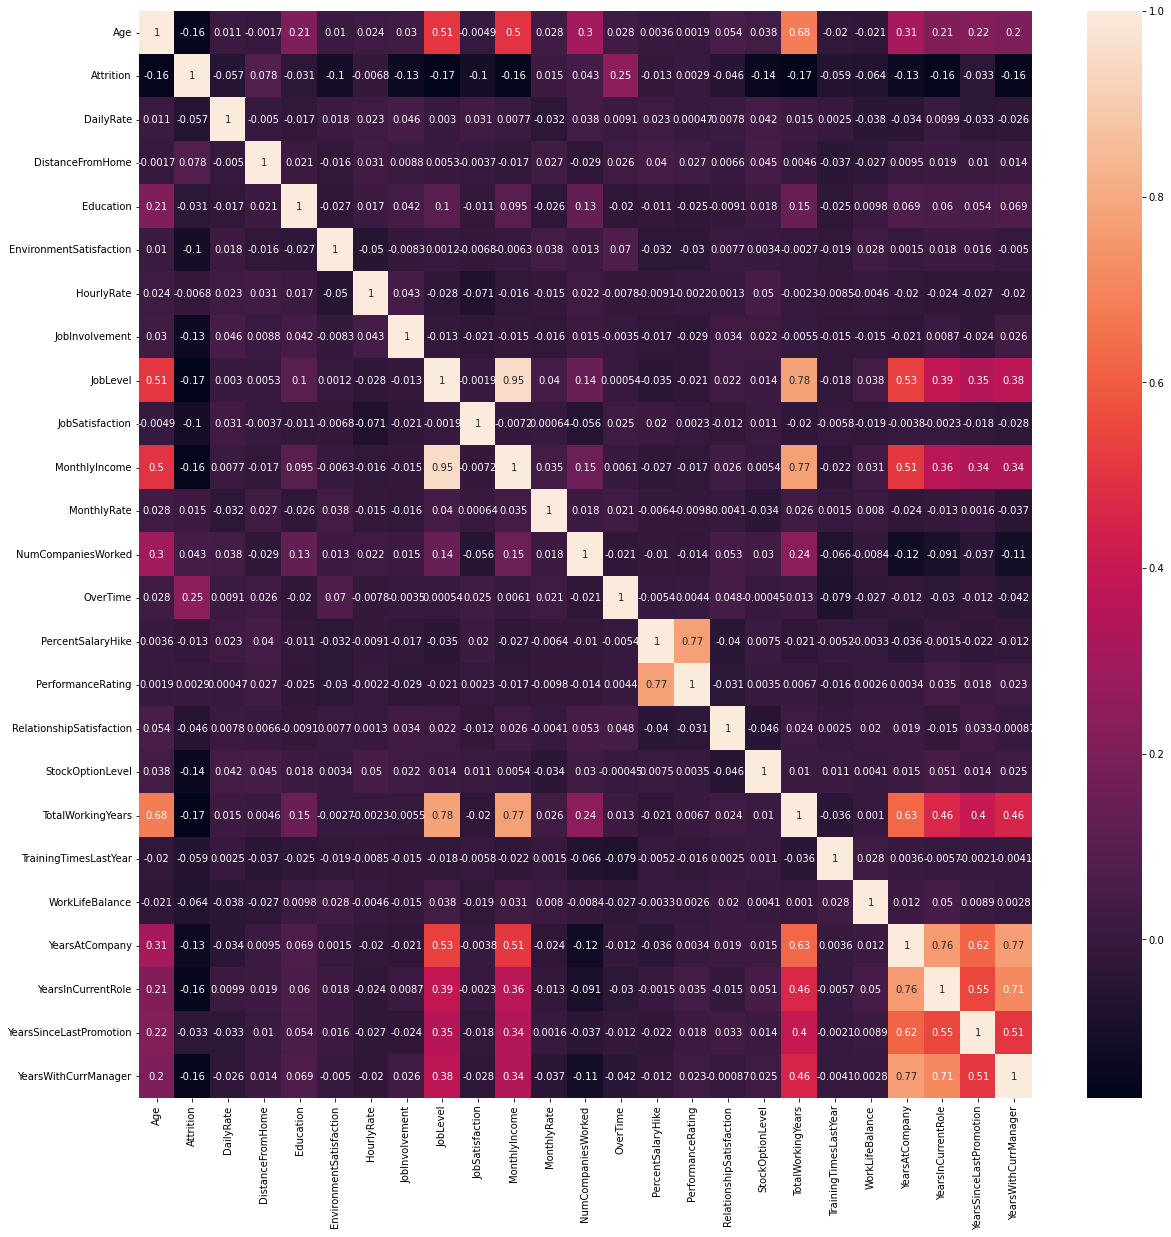

In [17]:
correlations = workers_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
plt.show()

**Observaciones:**
- Job level está altamente correlacionado con la cantidad de años trabajados: tiene sentido si con el tiempo vamos mejorando la tecnica y aprendiendo del trabajo
- Monthly income está altamente correlacionado con Job level: Si mejoramos nuestro nivel de trabajo es factible optar a aumentos de sueldo
- Monthly income está altamente correlacionado los años trabajados: Si trabajamos mas tiempo es probable que la empresa nos valore más con los años
- Age está altamente correlacionado con Monthly Income: Esto se acoge en el argumento anterior, pues si pasamos tiempo en la empresa se nos valora más y con el paso de los años nos hacemos mas viejos

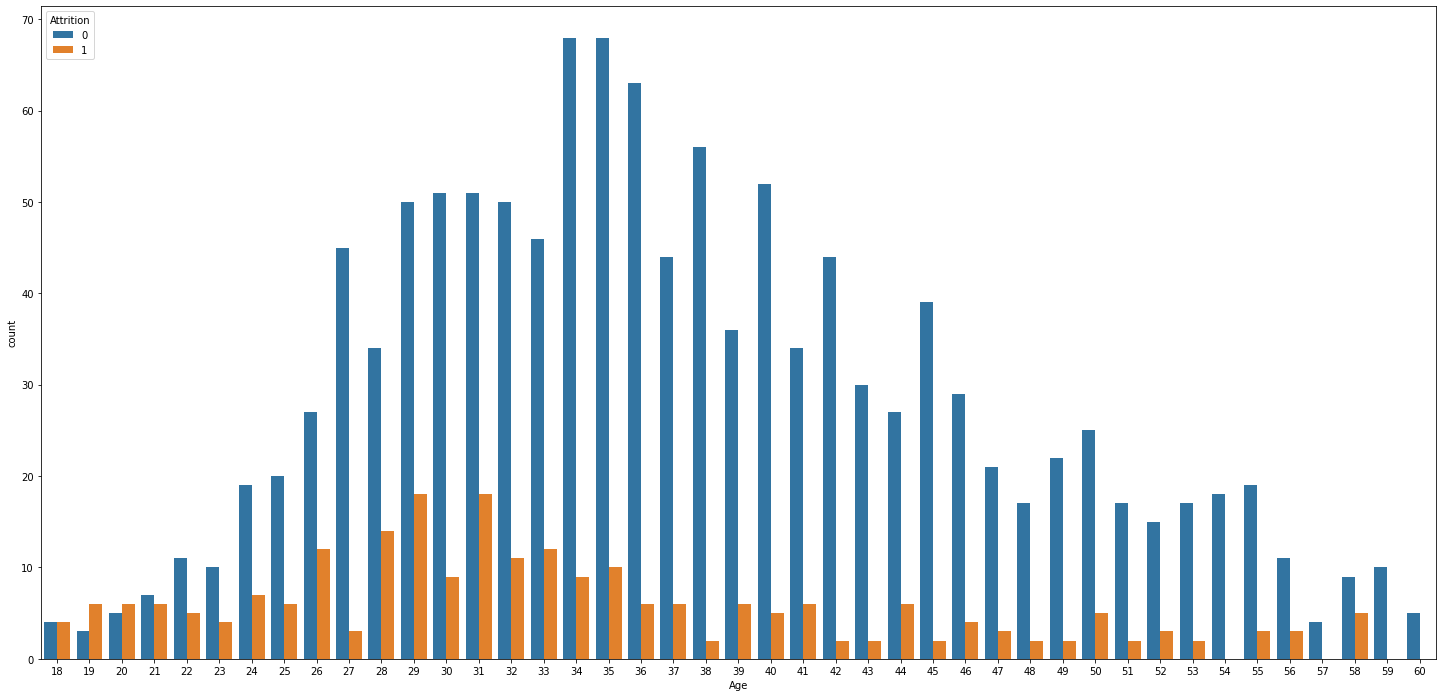

In [18]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = workers_df)
plt.show()

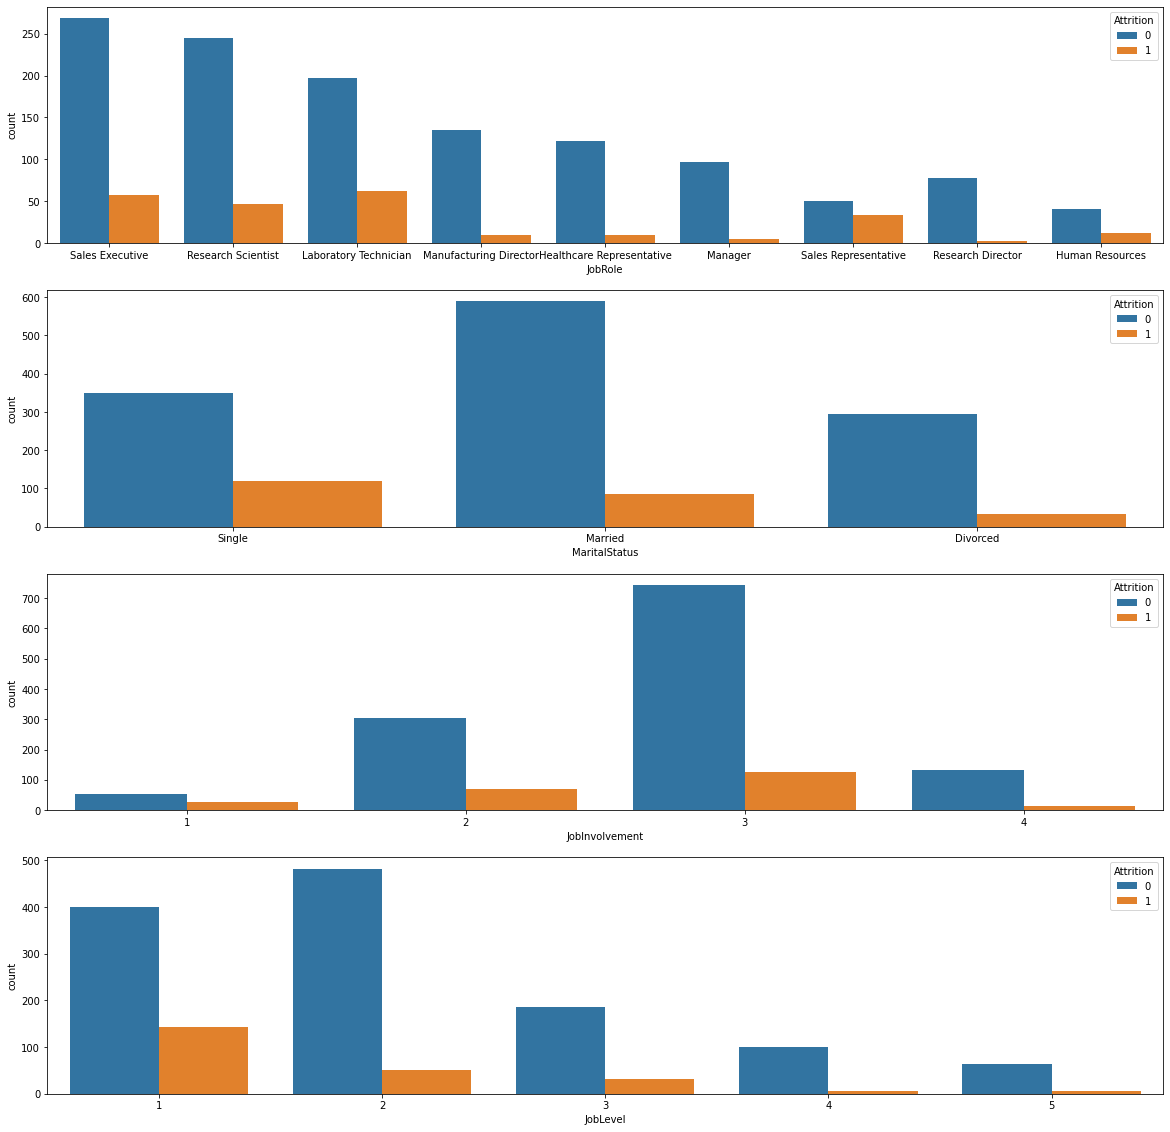

In [19]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = workers_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = workers_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = workers_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = workers_df)
plt.show()

**Observaciones:**
- Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
- Los representantes de ventas tienden a irse en comparación con cualquier otro departamento
- Los empleados menos involucrados tienden a dejar la empresa
- Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa

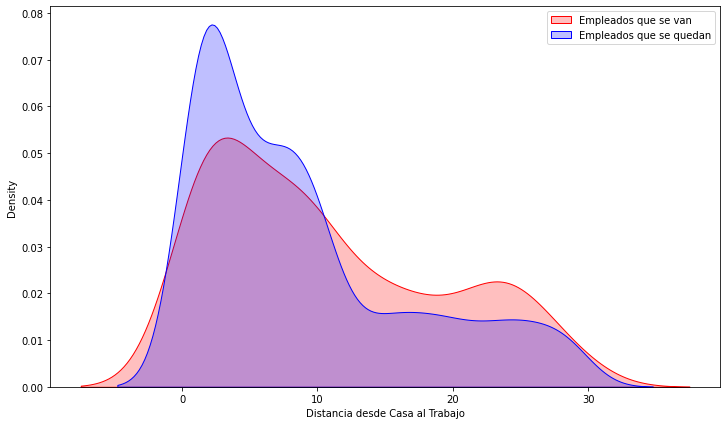

In [20]:
# Ahora compararemos las densidades estimadas para ciertas variables
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['DistanceFromHome'], label = "Empleados que se van", shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = "Empleados que se quedan", shade = True, color = 'b')

plt.xlabel('Distancia desde Casa al Trabajo')
plt.legend()
plt.show()

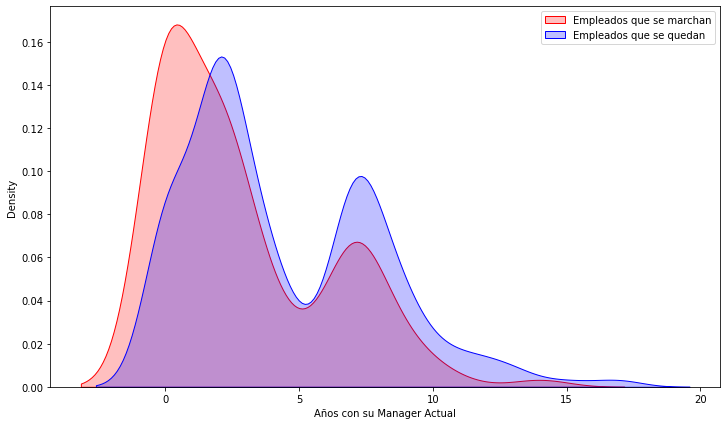

In [21]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')

plt.xlabel('Años con su Manager Actual')
plt.legend()
plt.show()

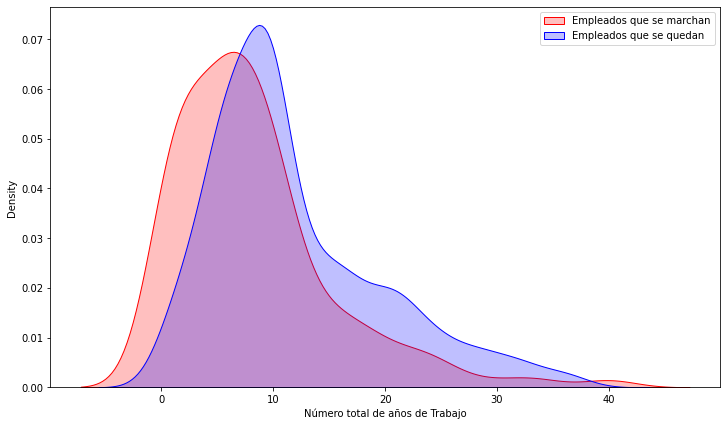

In [22]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['TotalWorkingYears'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = "Empleados que se quedan", shade = True, color = 'b')

plt.xlabel('Número total de años de Trabajo')
plt.legend()
plt.show()

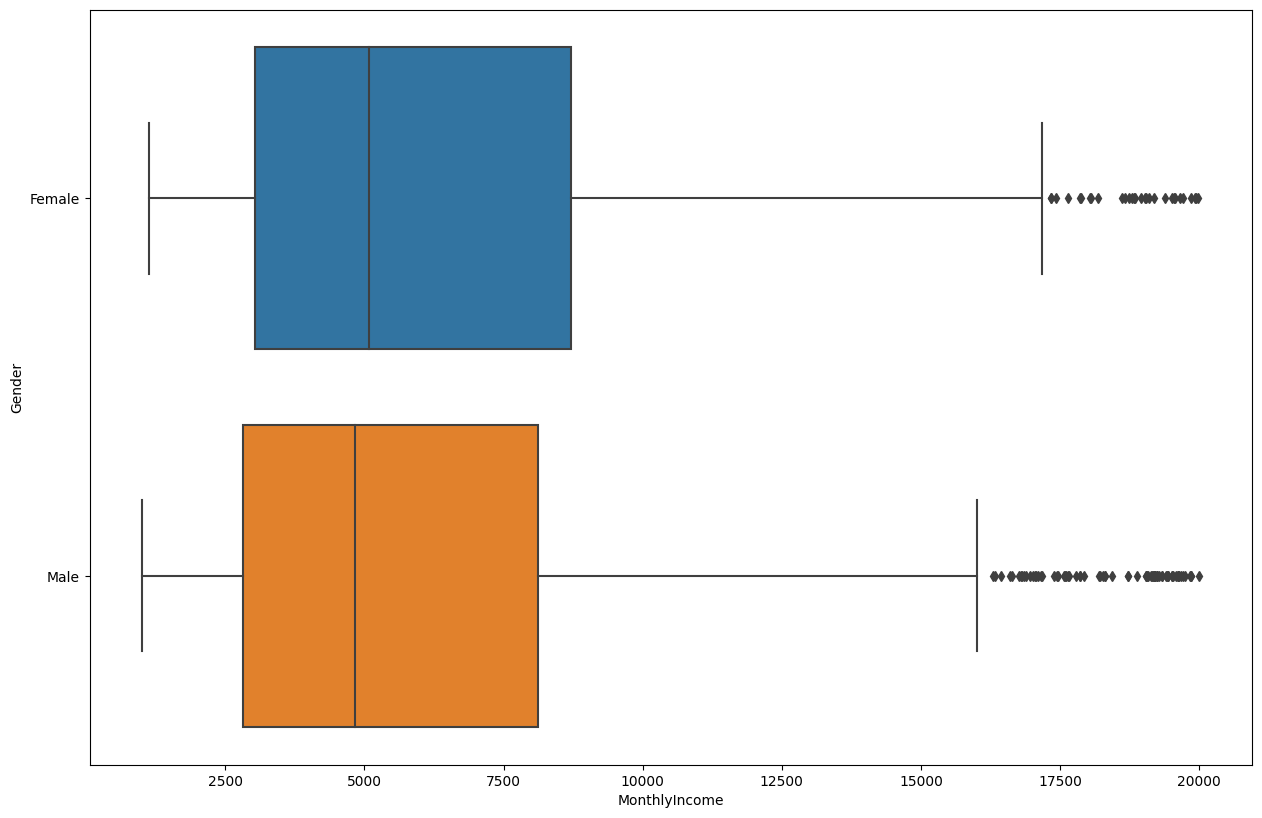

In [23]:
# Y haremos unos graficos de Caja y Bigote para complementar la estadistica e identificar posibles OutLiers
plt.figure(figsize=(15, 10), dpi = 100)
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = workers_df)
plt.show()

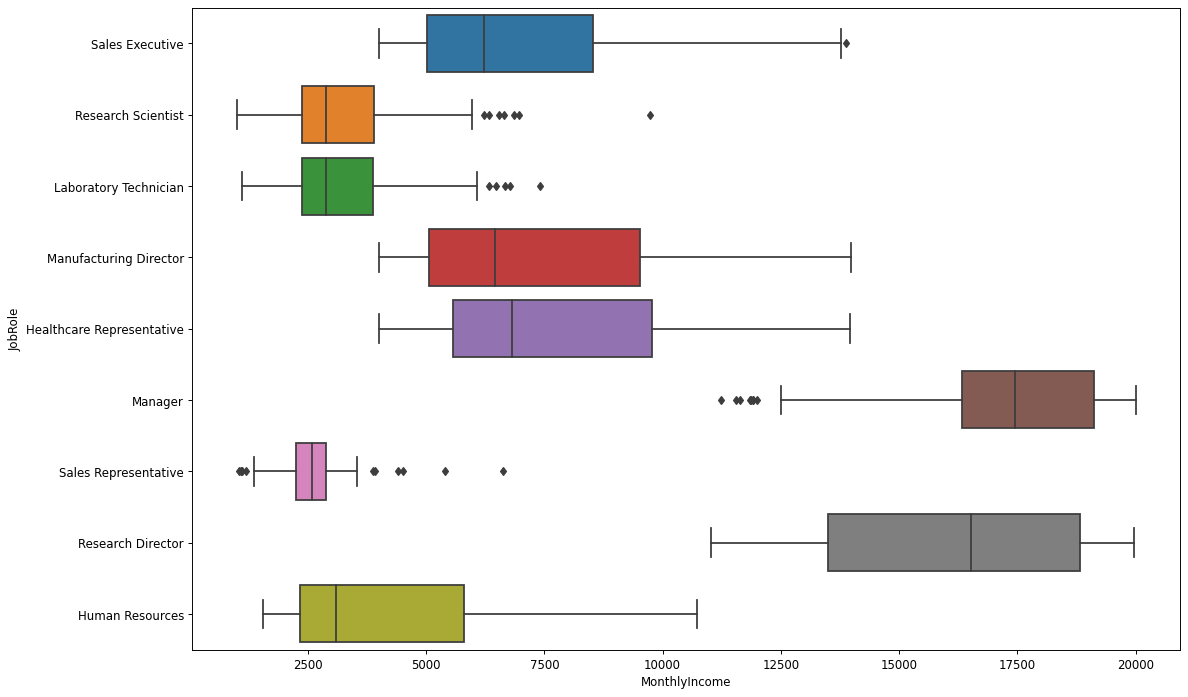

In [24]:
# monthly income vs. job role
plt.figure(figsize=(15, 10), dpi=85)
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = workers_df)
plt.show()

# PASO 3: CREAR LOS DATA SETS DE ENTRENAMIENTO Y TESTING

In [25]:
# Recogemos todas la variables categoricas
aux = workers_df.dtypes.astype(str)
var_cat = aux[aux == "object"].index.to_list()
var_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [26]:
X_cat = workers_df[var_cat]
X_cat.sample(3)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
1066,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married
117,Travel_Frequently,Sales,Technical Degree,Female,Sales Executive,Married
604,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married


In [27]:
# Usaremos OneHotEncoder para obtener las Variables Dummies de cada categoria
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
var_num = [x for x in workers_df.columns if x not in var_cat+["Attrition"]]
var_num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [29]:
X_num = workers_df[var_num]
X_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [30]:
X_all = pd.concat([X_cat, X_num], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [31]:
# Una vez que tenemos nuestro dataset con todas las variables a considerar, debemos reescalar estas para que todas tengan igual peso al momento de hacer el modelo
# Para esto usamos otra funcion dentro del paquete de preprocesado de SKlearn llamado MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [32]:
# Nuestro data frame ahora es una matriz, pero es esencialmente lo mismo
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [33]:
# Y por ultimo identificamos nuestra variable objetivo 
Y = workers_df['Attrition']
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [34]:
# Ya que tenemos nuestros datos listos, ahora debemos particionarlos en nuestro conjunto de training y testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=32)

In [35]:
X_train.shape, X_test.shape

((1102, 50), (368, 50))

# PRIMER MODELO: REGRESIÓN LOGÍSTICA

In [39]:
# Usamos linear_model que contiene funciones para ejecutar una Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, Y_train)

def custom_predict(X, threshold):
    probs = model.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
    
    
Y_pred = custom_predict(X=X_test, threshold=0.38) 

#Y_pred = model.predict(X_test)

In [40]:
accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred)

(0.875, 0.7, 0.45161290322580644, 0.5490196078431372)

In [41]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       328
           1       0.45      0.70      0.55        40

    accuracy                           0.88       368
   macro avg       0.71      0.80      0.74       368
weighted avg       0.91      0.88      0.89       368



In [42]:
ct = pd.crosstab(Y_test, Y_pred)
ct

col_0,0,1
Attrition,,
0,294,12
1,34,28


In [43]:
print("La precisión es: {}%".format(round(100*accuracy_score(Y_test, Y_pred),1)))

La precisión es: 87.5%


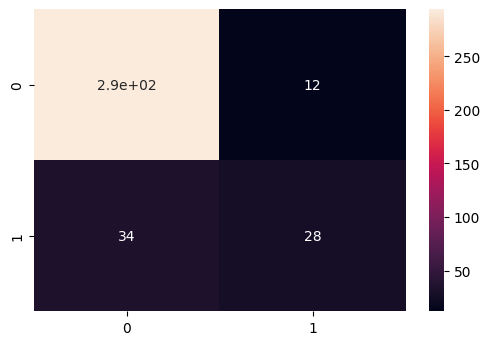

In [44]:
# Usaremos la matriz de confusion 
plt.figure(dpi=100)
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [45]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       328
           1       0.45      0.70      0.55        40

    accuracy                           0.88       368
   macro avg       0.71      0.80      0.74       368
weighted avg       0.91      0.88      0.89       368



In [46]:
# Hacemos un barrido por todo el Threshold para ver cual es el limite optimo

F1 = []
ACC = []
REC = []
PRE = []
P = np.linspace(0.05,0.95,100)

for p in P:
  Y_pred = custom_predict(X=X_test, threshold=p) 
  F1.append(f1_score(Y_test, Y_pred))
  ACC.append(accuracy_score(Y_test, Y_pred))
  REC.append(recall_score(Y_test, Y_pred))
  PRE.append(precision_score(Y_test, Y_pred))


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


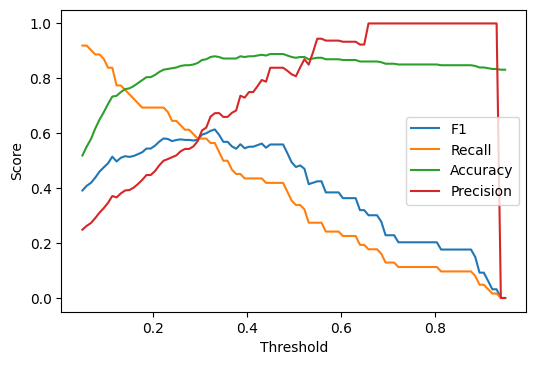

In [47]:
plt.figure(dpi = 100)
plt.plot(P,F1, label = "F1")
plt.plot(P,REC, label = "Recall")
plt.plot(P,ACC, label = "Accuracy")
plt.plot(P,PRE, label = "Precision")


plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

# SEGUNDO MODELO: RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [49]:
Y_pred = model.predict(X_test)

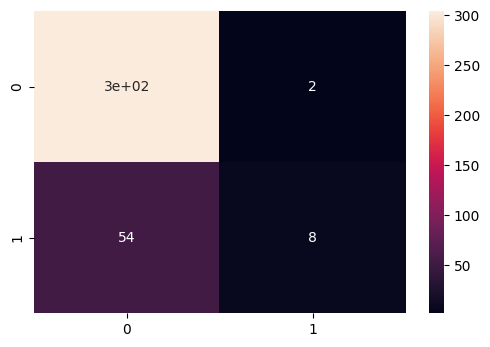

In [50]:
# Usaremos la matriz de confusion 
plt.figure(dpi=100)
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [51]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       306
           1       0.80      0.13      0.22        62

    accuracy                           0.85       368
   macro avg       0.82      0.56      0.57       368
weighted avg       0.84      0.85      0.80       368



# TERCER MODELO: REDES NEURONALES 

In [52]:
import tensorflow as tf

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = "relu", input_shape = (50,)))
model.add(tf.keras.layers.Dense(units = 500, activation = "relu"))
model.add(tf.keras.layers.Dense(units = 500, activation = "relu"))
model.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer="Adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [56]:
epochs_hist = model.fit(X_train, Y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 0.4397 - accuracy: 0.8067
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3657 - accuracy: 0.8475
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3259 - accuracy: 0.8721
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 0.8875
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2669 - accuracy: 0.8956
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2384 - accuracy: 0.9156
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1960 - accuracy: 0.9310
Epoch 8/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1589 - accuracy: 0.9419
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1240 - accuracy: 0.9583
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1027 - accuracy: 0.9619
Epoch 11

In [62]:
Y_pred = model.predict(X_test)

12/12 [==============================] - 0s 3ms/step


In [63]:
lim = 0.6
Y_pred = (Y_pred > lim).astype(int)

In [64]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

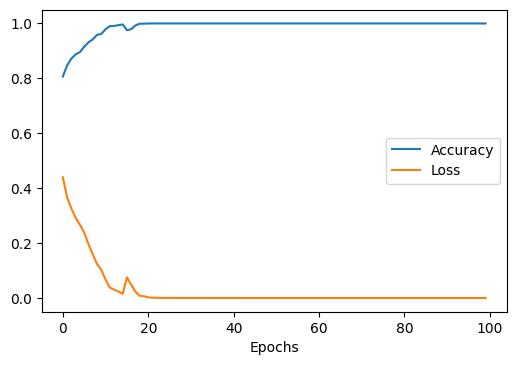

In [65]:
plt.figure(dpi = 100)
plt.plot(epochs_hist.history['accuracy'], label = "Accuracy")
plt.plot(epochs_hist.history['loss'], label = "Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

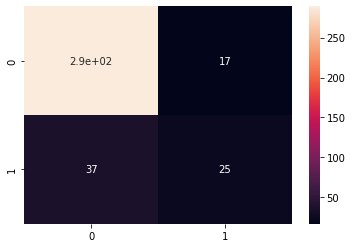

In [67]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [68]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       306
           1       0.60      0.40      0.48        62

    accuracy                           0.85       368
   macro avg       0.74      0.67      0.70       368
weighted avg       0.84      0.85      0.84       368

